# Rain Prediction in Australia Using Classification Algorithms
#### This project was done as a part of Honors Content in Machine Learning with Python Couse in the IBM Data Science Professional Certificate.


<h2>Table of Contents</h2>

* Basic Process
* Describing Data
* Importing Data<br>
* Data Preprocessing<br>
* Transforming Categorical Variables<br>
* Train and Test Data Splitting<br>
* Training Linear Regression, KNN, Decision Tree, Logistic Regression, and SVM models<br>
* Comparing their accuracy scores



# Overview of the process


We are going to use the classification algorithms to create a model based on our training data and evaluate our testing data using various evaluation metrics.

We will use these algorithms:

1.  Linear Regression
2.  KNN
3.  Decision Trees
4.  Logistic Regression
5.  SVM

We will evaluate our models using:

1.  Accuracy Score
2.  Jaccard Index
3.  F1-Score
4.  LogLoss
5.  Mean Absolute Error
6.  Mean Squared Error
7.  R2-Score

Finally, we will use models to generate the report displaying the accuracy scores.


# Data Gathering


The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset to be used has extra columns like 'RainToday' and our target is 'RainTomorrow', which was gathered from the Rattle at [https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData](https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)


This dataset contains observations of weather metrics for each day from 2008 to 2017. The **weatherAUS.csv** dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RISK_MM       | Amount of rain tomorrow                               | Millimeters     | float  |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)


## **Importing the required libraries**


In [1]:
# Surpressing warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

### Importing the <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv">Weather Dataset</a>


In [3]:
df = pd.read_csv('Weather_Data.csv')

df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


Describing the data

In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000
mean,14.877102,23.005564,3.342158,5.175787,7.168970,41.476307,15.077041,19.294405,68.243962,54.698563,1018.334424,1016.003085,4.318557,4.176093,17.821461,21.543656
std,4.554710,4.483752,9.917746,2.757684,3.815966,10.806951,7.043825,7.453331,15.086127,16.279241,7.020090,7.019915,2.526923,2.411274,4.894316,4.297053
min,4.300000,11.700000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.250000,35.000000,11.000000,15.000000,58.000000,44.000000,1013.700000,1011.300000,2.000000,2.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,41.000000,15.000000,19.000000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,18.800000,26.000000,1.400000,7.000000,10.200000,44.000000,20.000000,24.000000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,96.000000,54.000000,57.000000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


Finding the correlation values

In [5]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.771005,0.013995,0.569316,-0.063475,0.127792,-0.298040,0.225905,0.053946,0.273269,-0.391654,-0.353334,0.241248,0.164028,0.939307,0.753147
MaxTemp,0.771005,1.000000,-0.139306,0.510334,0.327422,0.073184,-0.349382,0.155542,-0.185382,-0.150741,-0.385853,-0.420375,-0.084695,-0.099217,0.858639,0.960805
Rainfall,0.013995,-0.139306,1.000000,-0.110343,-0.308962,0.149811,0.153696,0.039415,0.332636,0.305635,-0.037561,0.001780,0.245231,0.200999,-0.054297,-0.142748
Evaporation,0.569316,0.510334,-0.110343,1.000000,0.175932,0.245426,-0.077532,0.292469,-0.395651,-0.102295,-0.343581,-0.298303,-0.037051,-0.038422,0.606122,0.474599
Sunshine,-0.063475,0.327422,-0.308962,0.175932,1.000000,-0.029032,-0.058410,0.177813,-0.490631,-0.586476,-0.047789,-0.094507,-0.665014,-0.677861,0.113891,0.345528
WindGustSpeed,0.127792,0.073184,0.149811,0.245426,-0.029032,1.000000,0.256460,0.509825,-0.225613,-0.095037,-0.408876,-0.351850,0.024275,0.044016,0.159570,0.036216
WindSpeed9am,-0.298040,-0.349382,0.153696,-0.077532,-0.058410,0.256460,1.000000,0.197669,-0.189763,-0.148849,0.003737,0.091878,-0.062441,-0.018030,-0.334084,-0.351836
WindSpeed3pm,0.225905,0.155542,0.039415,0.292469,0.177813,0.509825,0.197669,1.000000,-0.288910,-0.135039,-0.333810,-0.277749,-0.050932,-0.095435,0.280009,0.136713
Humidity9am,0.053946,-0.185382,0.332636,-0.395651,-0.490631,-0.225613,-0.189763,-0.288910,1.000000,0.657933,0.262098,0.249202,0.431550,0.331062,-0.145944,-0.155192
Humidity3pm,0.273269,-0.150741,0.305635,-0.102295,-0.586476,-0.095037,-0.148849,-0.135039,0.657933,1.000000,0.151608,0.179611,0.463529,0.472248,0.131855,-0.212696


<Axes: >

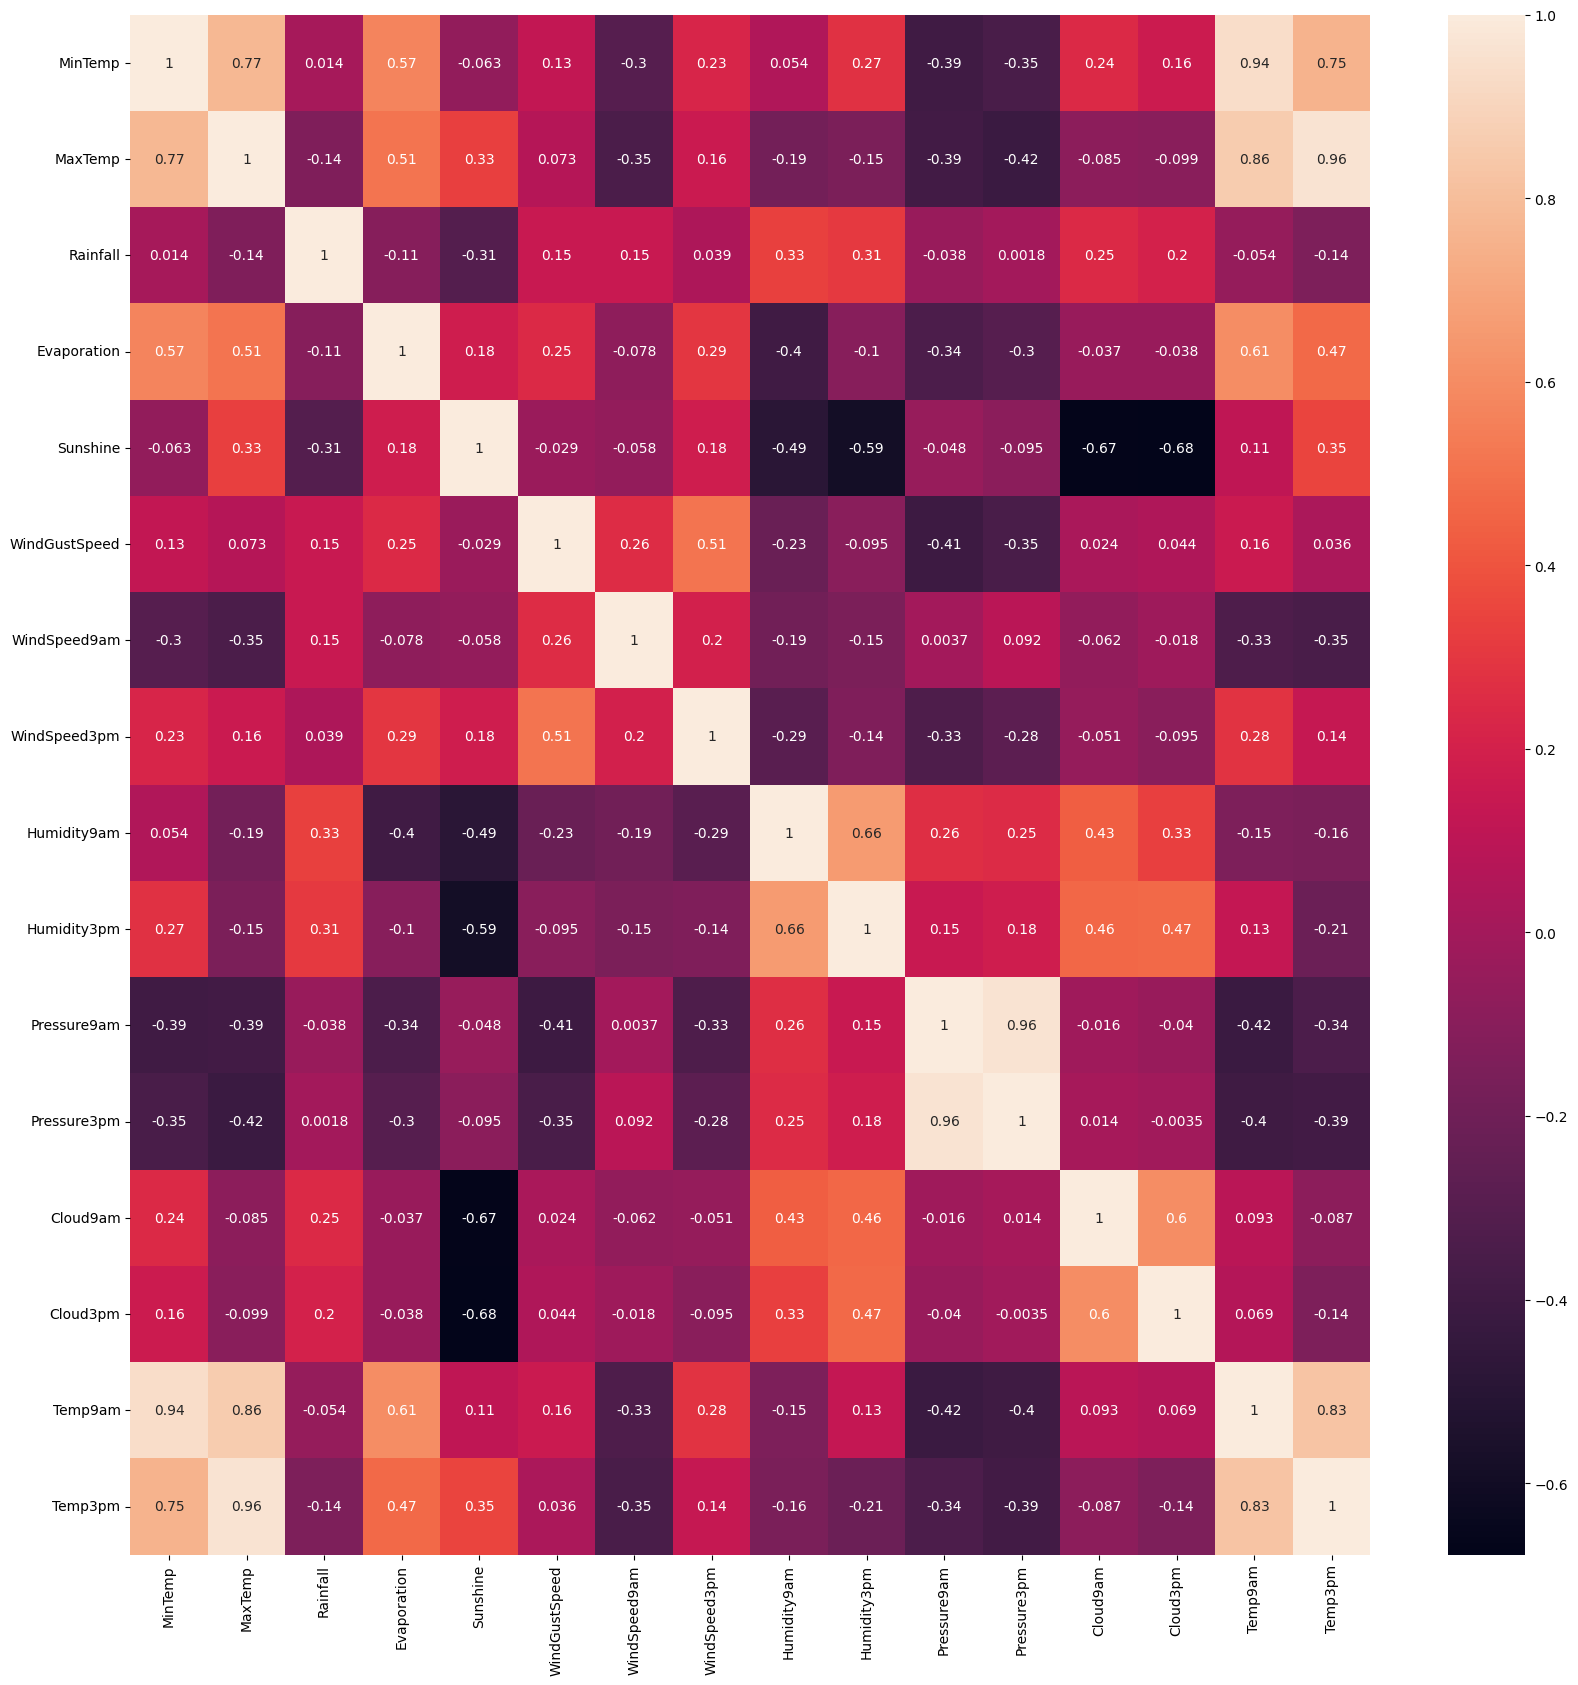

In [6]:
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)

In [7]:
df.dtypes

Date              object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed      int64
WindDir9am        object
WindDir3pm        object
WindSpeed9am       int64
WindSpeed3pm       int64
Humidity9am        int64
Humidity3pm        int64
Pressure9am      float64
Pressure3pm      float64
Cloud9am           int64
Cloud3pm           int64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

### Data Preprocessing


#### Transforming Categorical Variables


First, we need to convert categorical variables to binary variables. We will use pandas `get_dummies()` method for this.


In [8]:
df_proc = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])
df_proc

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,41,17,20,92,...,0,0,0,0,0,1,0,0,0,0
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,41,9,13,83,...,0,0,0,0,0,0,0,0,0,0
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,41,17,2,88,...,0,0,0,0,0,0,0,0,0,0
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,41,22,20,83,...,0,0,0,0,0,0,0,0,0,0
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,41,11,6,88,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,6/21/2017,8.6,19.6,0.0,2.0,7.8,37,22,20,73,...,0,0,0,0,1,0,0,0,0,0
3267,6/22/2017,9.3,19.2,0.0,2.0,9.2,30,20,7,78,...,0,0,0,0,0,0,0,0,0,0
3268,6/23/2017,9.4,17.7,0.0,2.4,2.7,24,15,13,85,...,0,0,0,0,0,0,0,0,0,0
3269,6/24/2017,10.1,19.3,0.0,1.4,9.3,43,17,19,56,...,0,0,0,0,0,0,0,1,0,0


Next, we replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. We do not use the `get_dummies` method because we would end up with two columns for 'RainTomorrow' and we do not want, since 'RainTomorrow' is our target.


In [9]:
df_proc.replace(['No', 'Yes'], [0,1], inplace=True)
df_proc[['Date','RainTomorrow']]

,Date,RainTomorrow
0,2/1/2008,1
1,2/2/2008,1
2,2/3/2008,1
3,2/4/2008,1
4,2/5/2008,1
...,...,...
3266,6/21/2017,0
3267,6/22/2017,0
3268,6/23/2017,0
3269,6/24/2017,0


## Training Data and Test Data


Now, we set our 'features' or x values and our Y or target variable.


In [10]:
df_proc.drop('Date',axis=1,inplace=True)

In [11]:
df_proc = df_proc.astype(float)

We need to predict if the rain will fall or not. So we choose the RainTomorrow column as the target.

In [12]:
features = df_proc.drop(columns='RainTomorrow', axis=1)
Y = df_proc['RainTomorrow']

## Linear Regression


#### Q1) Use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `10`.


In [13]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10)

#### Q2) Create and train a Linear Regression model called LinearReg using the training data (`x_train`, `y_train`).


In [14]:
LinearReg = LinearRegression()
LinearReg.fit(x_train, y_train)

LinearRegression()

#### Q3) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [15]:
predictions = LinearReg.predict(x_test)


#### Q4) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [16]:
LinearRegression_MAE = metrics.mean_absolute_error(predictions, y_test)
LinearRegression_MSE = metrics.mean_squared_error(predictions, y_test)
LinearRegression_R2 = metrics.r2_score(predictions, y_test)
print('Linear Regression MAE: ', LinearRegression_MAE)
print('Linear Regression MSE: ', LinearRegression_MSE)
print('Linear Regression R2: ', LinearRegression_R2)

Linear Regression MAE:  0.2563160816221747
Linear Regression MSE:  0.11572010752128793
Linear Regression R2:  -0.3847021991224995


#### Q5) Show the MAE, MSE, and R2 in a tabular format using data frame for the linear model.


In [17]:
Report = {'MSE': [LinearRegression_MSE], 'MAE': [LinearRegression_MAE], 'R2': [LinearRegression_R2]}
Report=pd.DataFrame(Report)
Report.index = ['Linear Regression']
Report

,MSE,MAE,R2
Linear Regression,0.11572,0.256316,-0.384702


### KNN


#### Q6) Create and train a KNN model called KNN using the training data (`x_train`, `y_train`) with the `n_neighbors` parameter set to `4`.


In [18]:
KNN = KNeighborsClassifier(n_neighbors=4)
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

#### Q7) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [19]:
predictions = KNN.predict(x_test)

#### Q8) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [20]:
KNN_Accuracy_Score = accuracy_score(y_test, predictions)
KNN_JaccardIndex = jaccard_score(y_test, predictions, pos_label=0)
KNN_F1_Score = f1_score(y_test, predictions, average='weighted')
print('KNN Accuracy Score: ', KNN_Accuracy_Score)
print('KNN Jaccard Index: ', KNN_JaccardIndex)
print('KNN F1 Score: ', KNN_F1_Score)

KNN Accuracy Score:  0.8183206106870229
KNN Jaccard Index:  0.7901234567901234
KNN F1 Score:  0.802374933635524


### Decision Tree


#### Q9) Create and train a Decision Tree model called Tree using the training data (`x_train`, `y_train`).


In [21]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 8)
Tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

#### Q10) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [22]:
predictions = Tree.predict(x_test)

#### Q11) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [23]:
Tree_Accuracy_Score = accuracy_score(y_test, predictions)
Tree_JaccardIndex = jaccard_score(y_test, predictions, pos_label=0)
Tree_F1_Score = f1_score(y_test, predictions)
print('Tree Accuracy Score: ', Tree_Accuracy_Score)
print('Tree Jaccard Index: ', Tree_JaccardIndex)
print('Tree F1 Score: ', Tree_F1_Score)

Tree Accuracy Score:  0.7923664122137405
Tree Jaccard Index:  0.7571428571428571
Tree F1 Score:  0.5828220858895705


### Logistic Regression


#### Q12) Use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `1`.


In [24]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=1)

#### Q13) Create and train a LogisticRegression model called LR using the training data (`x_train`, `y_train`) with the `solver` parameter set to `liblinear`.


In [25]:
LR = LogisticRegression(solver='liblinear')
LR.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

#### Q14) Now, use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [26]:
predictions = LR.predict(x_test)


#### Q15) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [27]:
LR_Accuracy_Score = accuracy_score(y_test, predictions)
LR_JaccardIndex = jaccard_score(y_test, predictions, pos_label=0)
LR_F1_Score = f1_score(y_test, predictions)
LR_Log_Loss = log_loss(y_test, LR.predict_proba(x_test))
print('LR Accuracy Score: ', LR_Accuracy_Score)
print('LR Jaccard Index: ', LR_JaccardIndex)
print('LR F1 Score: ', LR_F1_Score)
print('LR Log Loss: ', LR_Log_Loss)

LR Accuracy Score:  0.8351145038167939
LR Jaccard Index:  0.8018348623853211
LR F1 Score:  0.6707317073170731
LR Log Loss:  0.3815916633912949


### SVM


#### Q16) Create and train a SVM model called SVM using the training data (`x_train`, `y_train`).


In [28]:
SVM = svm.SVC(kernel='linear')
SVM.fit(x_train, y_train)

SVC(kernel='linear')

#### Q17) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [29]:
predictions = SVM.predict(x_test)


 #### Q18)Using the `predictions` and the `y_test` dataframe calculating the value for each metric using the appropriate function.


In [30]:
SVM_Accuracy_Score = accuracy_score(y_test, predictions)
SVM_JaccardIndex = jaccard_score(y_test, predictions, pos_label=0)
SVM_F1_Score = f1_score(y_test, predictions)
print('SVM Accuracy Score: ', SVM_Accuracy_Score)
print('SVM Jaccard Index: ', SVM_JaccardIndex)
print('SVM F1 Score: ', SVM_F1_Score)

SVM Accuracy Score:  0.8442748091603054
SVM Jaccard Index:  0.8125
SVM F1 Score:  0.6851851851851852


## Report


#### Showing the Accuracy,Jaccard Index, F1-Score and LogLoss in a tabular format using data frame for all of the above models.

\*LogLoss is only for Logistic Regression Model


In [31]:
Report = {'Classification Algorithm': ['KNN, K=4', 'Decision Tree',  'LogisticRegression','SVM'],
          'Accuracy Score': [KNN_Accuracy_Score, Tree_Accuracy_Score, LR_Accuracy_Score, SVM_Accuracy_Score],
          'Jaccard Score': [KNN_JaccardIndex, Tree_JaccardIndex, LR_JaccardIndex, SVM_JaccardIndex,],
          'F1-score': [KNN_F1_Score, Tree_F1_Score, LR_F1_Score, SVM_F1_Score], 
          'LogLoss': ['N/A', 'N/A', LR_Log_Loss, 'N/A']}
Report = pd.DataFrame(Report)
Report

,Classification Algorithm,Accuracy Score,Jaccard Score,F1-score,LogLoss
0,"KNN, K=4",0.818321,0.790123,0.802375,N/A
1,Decision Tree,0.792366,0.757143,0.582822,N/A
2,LogisticRegression,0.835115,0.801835,0.670732,0.381592
3,SVM,0.844275,0.812500,0.685185,N/A


In [53]:
import plotly.express as px

In [74]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=1)

fig.add_trace(
    go.Bar(x=Report['Classification Algorithm'], y=Report['Accuracy Score'], name='Accuracy Score'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=Report['Classification Algorithm'], y=Report['Jaccard Score'], name='Jaccard Score'),
    row=1, col=1
)
fig.add_trace(
    go.Bar(x=Report['Classification Algorithm'], y=Report['F1-score'], name='F1-score'), row=1,col=1
)
fig.add_trace(
    go.Bar(x=Report['Classification Algorithm'], y=Report['LogLoss'], name='LogLoss'), row=1,col=1
)

fig.update_layout(title_text="Accuracy Scores Of Classification Algorithms")
fig.update_yaxes(title_text="Score", row=1, col=1)
fig.update_xaxes(title_text="Classification Algorithm", row=1, col=1)
fig.show()


# Observation
* We can see that KNN with K=4 is the best model for predicting rain with almost 80% accuracy